In [ ]:
pip install tensorflow

     |████████████████████████████████| 463 kB 4.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.3.0 requires tensorflow-estimator<2.4.0,>=2.3.0, but you have tensorflow-estimator 2.7.0 which is incompatible.


In [ ]:
!nvidia-smi

Fri Dec 17 18:23:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    55W / 149W |    145MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

<tf.Tensor: shape=(), dtype=float32, numpy=-2081.6255>

In [ ]:
# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.705913931999987
GPU (s):
0.054145622000021376
GPU speedup over CPU: 68x


In [ ]:
pip install GDAL

In [ ]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 6.8 MB/s 


In [ ]:
pip install pyrsgis

In [ ]:
import os
import numpy as np
from tensorflow import keras
from pyrsgis import raster
from pyrsgis.convert import changeDimension
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import rasterio

In [ ]:
import keras 

In [ ]:
import numpy as num
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
data_path=r"/content/LC08_L1TP_035034_20160120_20170224_01_T1.TIF"
mask_path=r"/content/edited_corrected_gts_LC08_L1TP_035034_20160120_20170224_01_T1.TIF"
data2_path=r"/content/LC08_L1TP_002053_20160520_20170324_01_T1.TIF"
data2_mask=r"/content/edited_corrected_gts_LC08_L1TP_002053_20160520_20170324_01_T1.TIF"

In [ ]:
sd1,data=raster.read(data_path,bands="all")
d2,mask=raster.read(mask_path,bands="all")
d3,data1=raster.read(data2_path,bands="all")
d4,mask1=raster.read(data2_mask,bands="all")

In [ ]:
data.shape

(3, 7711, 7571)

In [ ]:
r,g,b=data[0],data[1],data[2]
r1,g1,b1=data1[0],data1[1],data1[2]

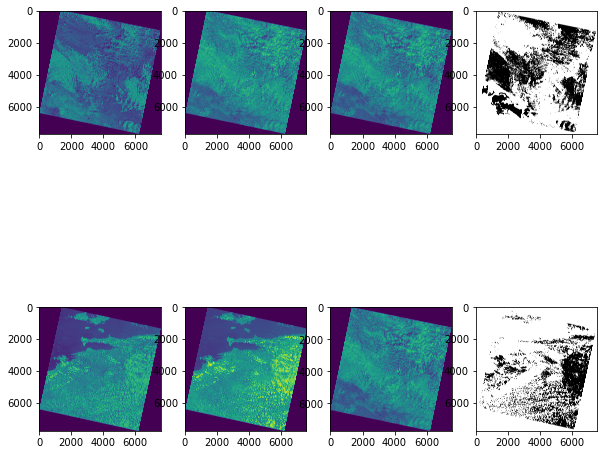

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,4,1)
plt.imshow(r)
plt.subplot(2,4,2)
plt.imshow(g)
plt.subplot(2,4,3)
plt.imshow(b)
plt.subplot(2,4,4)
plt.imshow(mask,cmap="gray")
plt.subplot(2,4,5)
plt.imshow(r1)
plt.subplot(2,4,6)
plt.imshow(g1)
plt.subplot(2,4,7)
plt.imshow(b)
plt.subplot(2,4,8)
plt.imshow(mask1,cmap="gray")



In [ ]:
pip install patchify

In [ ]:
import cv2

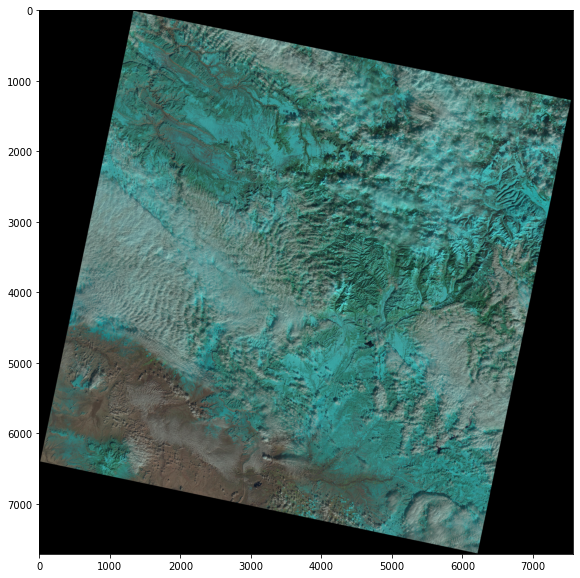

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.merge((r,g,b)))

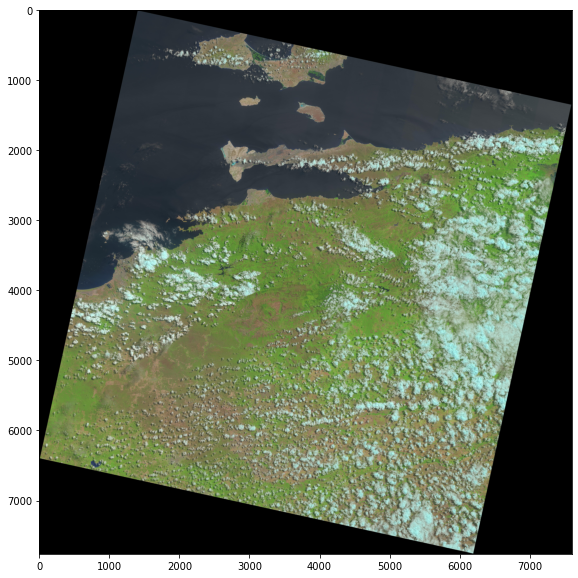

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.merge((r1,g1,b1)))

In [ ]:
import patchify as patch
#import cv2
from PIL import Image

In [ ]:
re_data=cv2.merge((r,g,b))
re2_data=cv2.merge((r1,g1,b1))

In [ ]:
new_d=Image.fromarray(re_data)
new_mask=Image.fromarray(mask)
new_d1=Image.fromarray(re2_data)
new1_mask=Image.fromarray(mask1)

In [ ]:
h=(mask.shape[0]//256)*256
w=(mask.shape[1]//256)*256

In [ ]:
new_d=new_d.crop((0,0,h,w))
new_mask=new_mask.crop((0,0,h,w))
new_d1=new_d1.crop((0,0,h,w))
new1_mask=new1_mask.crop((0,0,h,w))

In [ ]:
new_d=num.array(new_d)
new_mask=num.array(new_mask)
new_d1=num.array(new_d1)
new1_mask=num.array(new1_mask)

In [ ]:
print(new_d.shape)
print(new_mask.shape)
print(new_d1.shape)
print(new1_mask.shape)

(7424, 7680, 3)
(7424, 7680)
(7424, 7680, 3)
(7424, 7680)


In [ ]:
from patchify import patchify


In [ ]:
image_set=[new_d,new_d1]
mask_set=[new_mask,new1_mask]

In [ ]:
pip install segmentation_models

     |████████████████████████████████| 50 kB 3.9 MB/s 


In [ ]:
patches=patchify(image_set[0],patch_size=(256,256,3),step=256)
patches.shape

(29, 30, 1, 256, 256, 3)

In [ ]:
patches_mask=patchify(new_mask,patch_size=(256,256),step=256)
patches_mask.shape


(29, 30, 256, 256)

In [ ]:
num.unique(patches_mask)

array([0, 1], dtype=uint8)

In [ ]:
train_img=[]
train_mask=[]


In [ ]:
c=0
for indx in range(len(image_set)):
  temp_img=image_set[indx]
  temp_mask=mask_set[indx]
  patches=patchify(temp_img,patch_size=(256,256,3),step=256)
  patches_mask=patchify(temp_mask,patch_size=(256,256),step=256)
  #print(patches.shape,patches_mask.shape)
  #break
  for i in range(patches.shape[0]):
      for j in range(patches.shape[1]):
          image1=patches[i,j,:,:]
          image1=image1[0]
          image_mask=patches_mask[i,j,:,:]


          #print(image1.shape,image_mask.shape)
          
        
        
        
          count,weig=num.unique(image_mask,return_counts=True)

        #print(count,weig)
          if len(count)>1:
            area=weig[0]/weig.sum()
            #train_img.append(image1)
            #train_mask.append(image_mask)
            if area >0.02:
              train_img.append(image1)
              train_mask.append(image_mask)
              #rint("found")
              c=c+1
        
        
 

In [ ]:
print(c)

1045


In [ ]:
train_img=num.array(train_img)
train_mask=num.array(train_mask)

In [ ]:
print(train_img.shape,train_mask.shape)


(1045, 256, 256, 3) (1045, 256, 256)


In [ ]:
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from keras.models import Model
from keras.layers import Flatten,Input,Conv2D,Dense,MaxPooling2D,BatchNormalization,Dropout,concatenate,Conv2DTranspose
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler,StandardScaler

Segmentation Models: using `keras` framework.


In [ ]:
updated_labels=to_categorical(train_mask,num_classes=len(num.unique(train_mask)))

In [ ]:
updated_labels.shape

(1045, 256, 256, 2)

In [ ]:
train_img=train_img/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_img,updated_labels,test_size=0.05,random_state=42)

In [ ]:
def build_unet(x,y,z):
    inputs=Input(shape=(x,y,z))
    s=inputs
    c1=Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(s)
    c1=Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

        #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(2, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model
    

In [ ]:
x,y,z=256,256,3

In [ ]:
model=build_unet(x,y,z)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d_2[0][0]']               
                                )                                                             

In [ ]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [ ]:
metrics=["accuracy",jacard_coef]

In [ ]:
model.compile(loss=sm.losses.categorical_focal_jaccard_loss,optimizer="adam",metrics=metrics)


In [ ]:
import keras.backend as K

In [ ]:
x_train.shape

(992, 256, 256, 3)

In [ ]:
with tf.device("/device:GPU:0"):
  hist=model.fit(x_train,y_train,epochs=200,batch_size=8,validation_split=0.05)

Epoch 1/200
118/118 [==============================] - 34s 235ms/step - loss: 0.4306 - accuracy: 0.7861 - jacard_coef: 0.6283 - val_loss: 0.3455 - val_accuracy: 0.8478 - val_jacard_coef: 0.6988
Epoch 2/200
118/118 [==============================] - 24s 200ms/step - loss: 0.3249 - accuracy: 0.8636 - jacard_coef: 0.7401 - val_loss: 0.3425 - val_accuracy: 0.8556 - val_jacard_coef: 0.7040
Epoch 3/200
118/118 [==============================] - 23s 199ms/step - loss: 0.3118 - accuracy: 0.8696 - jacard_coef: 0.7511 - val_loss: 0.3173 - val_accuracy: 0.8621 - val_jacard_coef: 0.7331
Epoch 4/200
118/118 [==============================] - 24s 199ms/step - loss: 0.2958 - accuracy: 0.8779 - jacard_coef: 0.7657 - val_loss: 0.2928 - val_accuracy: 0.8768 - val_jacard_coef: 0.7454
Epoch 5/200
118/118 [==============================] - 23s 199ms/step - loss: 0.2808 - accuracy: 0.8818 - jacard_coef: 0.7730 - val_loss: 0.2757 - val_accuracy: 0.8824 - val_jacard_coef: 0.7681
Epoch 6/200
118/118 [=========

In [ ]:
pre_process=sm.get_preprocessing("resnet34")
train_data=pre_process(x_train)
test_data=pre_process(x_test)

In [ ]:
keras.backend.set_image_data_format('channels_last')

sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [ ]:
model_unet = sm.Unet('resnet34', encoder_weights='imagenet',classes=2,activation="softmax")

85532672/85521592 [==============================] - 16s 0us/step


In [ ]:
model_unet.compile(optimizer="adam",metrics=metrics,loss=sm.losses.categorical_focal_jaccard_loss)

In [ ]:
model_unet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

In [ ]:
with tf.device("/device:GPU:0"):
  hist2=model_unet.fit(train_data,y_train,epochs=200,batch_size=8,validation_split=0.1)

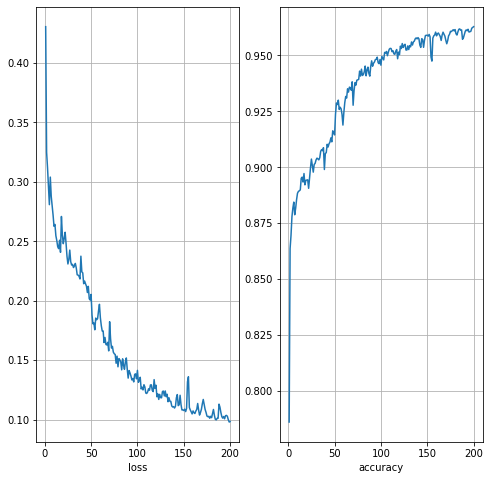

In [ ]:
loss=hist.history["loss"]
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
epochs=range(1,len(loss)+1)
plt.grid(True)
plt.plot(epochs,loss,label="loss value")
plt.xlabel("loss")
acc=hist.history["accuracy"]
plt.subplot(1,2,2)
plt.grid(True)
plt.plot(epochs,acc,label="accuracy")
plt.xlabel("accuracy")
plt.show()

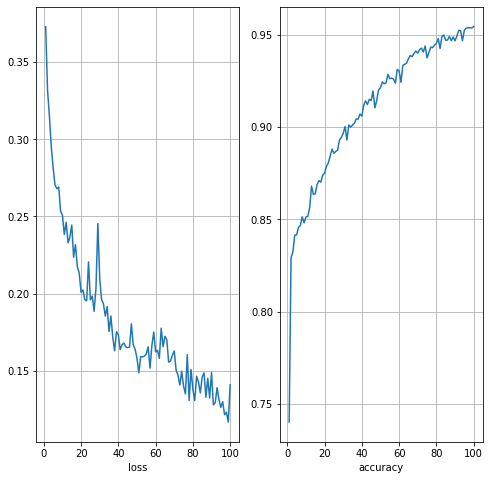

In [ ]:
loss=hist2.history["loss"]
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
epochs=range(1,len(loss)+1)
plt.grid(True)
plt.plot(epochs,loss,label="loss value")
plt.xlabel("loss")
acc=hist.history["accuracy"]
plt.subplot(1,2,2)
plt.grid(True)
plt.plot(epochs,acc,label="accuracy")
plt.xlabel("accuracy")
plt.show()

In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
Iou=MeanIoU(num_classes=2)

In [ ]:
print("mean_Iou-score",Iou.result().numpy())

mean_Iou-score 0.0


In [ ]:
samp=x_train[6]
samp=num.expand_dims(samp,axis=0)
print(samp.shape)


(1, 256, 256, 3)


In [ ]:
samp_mask=y_train[6]
print(samp_mask.shape)

(256, 256, 2)


In [ ]:
model.evaluate(x_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - jacard_coef: 0.0000e+00


[0.0, 0.0, 0.0]

In [ ]:
pred=model.predict(samp)

In [ ]:
re_red=num.argmax(pred,axis=3)

Text(0.5, 0, 'satellite image')

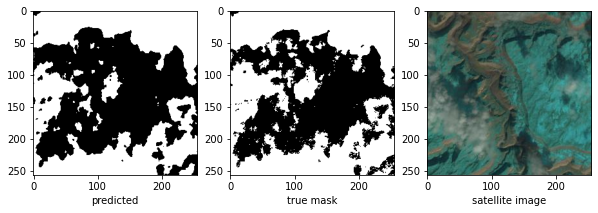

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(re_red[0],cmap="gray")
plt.xlabel("predicted")
plt.subplot(1,3,2)
plt.imshow(num.argmax(samp_mask,axis=2),cmap="gray")
plt.xlabel("true mask")
plt.subplot(1,3,3)
plt.imshow(train_img[6])
plt.xlabel("satellite image")
